# Лабораторная работа № 2
# Себаштиау Кета
# Вариант 2: Отмена рейсов
1. Подсчитайте количество отменённых рейсов.
2. Определите аэропорт, рейсы для которого отменяются наиболее часто.
3. Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом. Оцените значение p-value. Постройте плотность распределения признаков.
4. Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.
5. Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний.
6. Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов).
7. Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.
8. Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине.
9. Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию.


In [1]:
import pandas as pd
# low_memory = False для уменьшения использования памяти pandas
df = pd.read_csv('flights.csv', low_memory = False)
df.head(100)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015,1,1,4,B6,2001,N358JB,BUF,JFK,535,...,648.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
96,2015,1,1,4,B6,2807,N190JB,PWM,JFK,535,...,635.0,-25.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
97,2015,1,1,4,B6,2023,N324JB,JFK,SJU,535,...,1039.0,19.0,0,0,NaN,0.0,0.0,19.0,0.0,0.0
98,2015,1,1,4,EV,4557,N12967,CRP,IAH,535,...,615.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# 1.Подсчитайте количество отменённых рейсов.

In [2]:
print('Отменённых рейсов: ', sum(df.CANCELLED == 1))

Отменённых рейсов:  89884


# 2.Определите аэропорт, рейсы для которого отменяются наиболее часто.

In [3]:
most_cancelled = df.groupby(['ORIGIN_AIRPORT'])[['CANCELLED']].count()
most_cancelled.sort_values(by=['CANCELLED'], ascending=False)


,CANCELLED
ORIGIN_AIRPORT,
ATL,346836
ORD,285884
DFW,239551
DEN,196055
LAX,194673
...,...
13541,11
14222,9
10165,9


Аэропорт с наибольшим количеством отмененных рейсов - ATL: 346836 

# 3.Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом. Оцените значение p-value. Постройте плотность распределения признаков.

In [33]:
# Импорт модулей для исп. стат. функций пирсона и спирмана
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder

import seaborn

In [5]:
label_encoder = LabelEncoder()
dayCoder = pd.Series(label_encoder.fit_transform(df['DAY_OF_WEEK']))
pears = pearsonr(dayCoder, df.CANCELLED)
spear = spearmanr(dayCoder, df.CANCELLED)
print('Отмена рейса - день недели')
print('Коэффициент Пирсона: ', pears)
print('Коэффициент Спирмана: ', spear)
def pValue(spear):
    if spear[1] < 0.05:
        print('p-value is good')
    else:
        print('p-value is not good')
pValue(spear)

Отмена рейса - день недели
Коэффициент Пирсона:  (-0.022230160330716127, 0.0)
Коэффициент Спирмана:  SpearmanrResult(correlation=-0.022767803841688, pvalue=0.0)
p-value is good


In [6]:
label_encoder = LabelEncoder()
monthCoder = pd.Series(label_encoder.fit_transform(df['MONTH']))
pears = pearsonr(monthCoder, df.CANCELLED)
spear = spearmanr(monthCoder, df.CANCELLED)
print('Отмена рейса - месяц')
print('Коэффициент Пирсона: ', pears)
print('Коэффициент Спирмана: ', spear)
pValue(spear)

Отмена рейса - месяц
Коэффициент Пирсона:  (-0.05504306001039686, 0.0)
Коэффициент Спирмана:  SpearmanrResult(correlation=-0.05513296176216329, pvalue=0.0)
p-value is good


In [7]:
label_encoder = LabelEncoder()
airlineCoder = pd.Series(label_encoder.fit_transform(df.AIRLINE))
pears = pearsonr(airlineCoder, df.CANCELLED)
spear = spearmanr(airlineCoder, df.CANCELLED)
print('Отмена рейса - авиакомпания')
print('Коэффициент Пирсона: ', pears)
print('Коэффициент Спирмана: ', spear)
pValue(spear)

Отмена рейса - авиакомпания
Коэффициент Пирсона:  (0.004359972463785405, 7.174621551202461e-26)
Коэффициент Спирмана:  SpearmanrResult(correlation=0.0050961678376882, pvalue=9.822977461217948e-35)
p-value is good


In [8]:
label_encoder = LabelEncoder()
airportCoder = pd.Series(label_encoder.fit_transform(df['ORIGIN_AIRPORT']))
pears = pearsonr(airportCoder, df.CANCELLED)
spear = spearmanr(airportCoder, df.CANCELLED)
print('Отмена рейса - аэропорт')
print('Коэффициент Пирсона: ', pears)
print('Коэффициент Спирмана: ', spear)
pValue(spear)

Отмена рейса - аэропорт
Коэффициент Пирсона:  (0.013248131507266827, 3.9798705121089426e-224)
Коэффициент Спирмана:  SpearmanrResult(correlation=0.006906929486073159, pvalue=2.4918100216920145e-62)
p-value is good


<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='Density'>

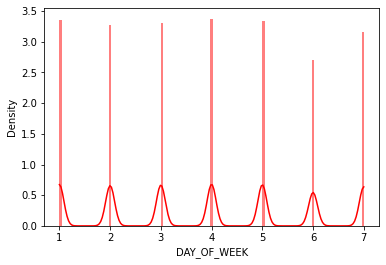

In [9]:
# Графики плотности распределения признаков
seaborn.histplot(df['DAY_OF_WEEK'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)

<AxesSubplot:xlabel='MONTH', ylabel='Density'>

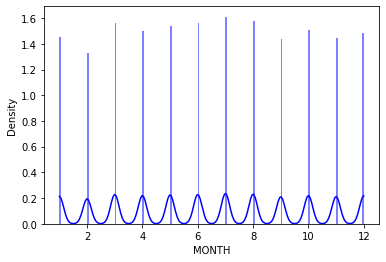

In [10]:
seaborn.histplot(df['MONTH'], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)


<AxesSubplot:xlabel='ORIGIN_AIRPORT', ylabel='Density'>

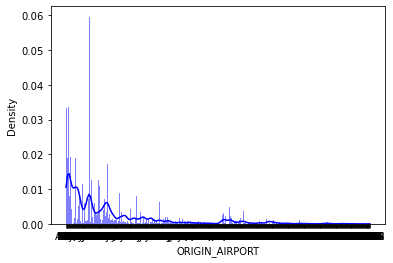

In [11]:
seaborn.histplot(df['ORIGIN_AIRPORT'], color="blue", label="20% Equities", kde=True, stat="density", linewidth=0)

<AxesSubplot:xlabel='AIRLINE', ylabel='Density'>

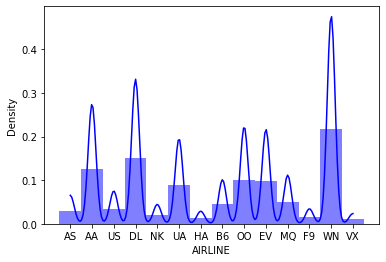

In [12]:
seaborn.histplot(df['AIRLINE'], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)

# 4.Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.

In [13]:
# Считаем кол-во строк из фильтрованных датафреймов
print('Аэропорт AS:')
print('Рейсов: ',df[df.AIRLINE == 'AS'].shape[0])
print('Отмененных рейсов: ',df[(df.CANCELLED == 1) & (df.AIRLINE == 'AS')].shape[0])
print('Перенаправленных рейсов: ',df[(df.DIVERTED == 1) & (df.AIRLINE == 'AS')].shape[0])



Аэропорт AS:
Рейсов:  172521
Отмененных рейсов:  669
Перенаправленных рейсов:  413


In [14]:
print('Аэропорт AA:')
print('Рейсов: ',df[df.AIRLINE == 'AA'].shape[0])
print('Отмененных рейсов: ',df[(df.CANCELLED == 1) & (df.AIRLINE == 'AA')].shape[0])
print('Перенаправленных рейсов: ',df[(df.DIVERTED == 1) & (df.AIRLINE == 'AA')].shape[0])


Аэропорт AA:
Рейсов:  725984
Отмененных рейсов:  10919
Перенаправленных рейсов:  2130


In [15]:
print('Аэропорт US:')
print('Рейсов: ',df[df.AIRLINE == 'US'].shape[0])
print('Отмененных рейсов: ',df[(df.CANCELLED == 1) & (df.AIRLINE == 'US')].shape[0])
print('Перенаправленных рейсов: ',df[(df.DIVERTED == 1) & (df.AIRLINE == 'US')].shape[0])

Аэропорт US:
Рейсов:  198715
Отмененных рейсов:  4067
Перенаправленных рейсов:  425


# 5.Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний.

In [16]:
df['FLIGHT_SPEED'] = df['DISTANCE']/df['AIR_TIME']
speed_df = df[['AIRLINE', 'FLIGHT_SPEED']]
speed_df



,AIRLINE,FLIGHT_SPEED
0,AS,8.568047
1,AA,8.859316
2,US,8.631579
3,AA,9.077519
4,AS,7.276382
...,...,...
5819074,B6,9.599265
5819075,B6,8.292308
5819076,B6,8.111675
5819077,B6,8.256944


In [17]:
# mean() возвращает среднее значение для каждого
avg_df = speed_df.groupby(['AIRLINE'])['FLIGHT_SPEED'].mean()
avg_df.head(3)

AIRLINE
AA    7.127989
AS    7.258512
B6    6.992831
Name: FLIGHT_SPEED, dtype: float64

# 6.Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов).

<AxesSubplot:xlabel='FLIGHT_NUMBER', ylabel='DAY'>

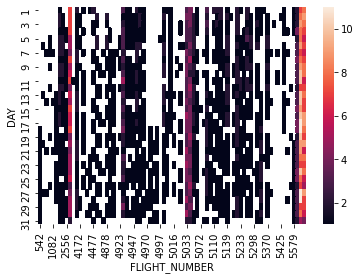

In [18]:
# Оставляем номер рейса и день отмены, заносим срез в дф heatmap
heatmap=df[(df['ORIGIN_AIRPORT']=='ABE')][['FLIGHT_NUMBER', 'DAY']]
# Добавляем новое поле counts, считаем кол-во отмен каждого рейса для каждого дня с помощью value_counts
heatmap=heatmap.groupby('FLIGHT_NUMBER')['DAY'].value_counts().reset_index(name='Counts')
# Преобразуем в сводную таблицу, заносим её в heatmap1
heatmap1 = heatmap.pivot_table(values='Counts',index='DAY',columns='FLIGHT_NUMBER')
# Рисуем темловую карту
seaborn.heatmap(heatmap1)

<AxesSubplot:xlabel='FLIGHT_NUMBER', ylabel='DAY'>

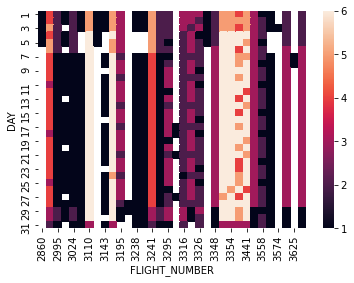

In [19]:
# Аналогично для другого аэропорта ABI
heatmap=df[(df['ORIGIN_AIRPORT']=='ABI')][['FLIGHT_NUMBER', 'DAY']]
heatmap=heatmap.groupby('FLIGHT_NUMBER')['DAY'].value_counts().reset_index(name='Counts')
heatmap2 = heatmap.pivot_table(values='Counts',index='DAY',columns='FLIGHT_NUMBER')
seaborn.heatmap(heatmap2)

# 7.Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.

In [20]:
# Оставляем только 3 любых аэропорта, и столбцы с аэропортом и задержкой
delay_map=df[(df['ORIGIN_AIRPORT']=='ABE') | (df['ORIGIN_AIRPORT']=='ABI') |
             (df['ORIGIN_AIRPORT']=='ABQ')][['ORIGIN_AIRPORT','DEPARTURE_DELAY']]
delay_map.sort_values(by=['ORIGIN_AIRPORT'])

,ORIGIN_AIRPORT,DEPARTURE_DELAY
957498,ABE,13.0
2756124,ABE,-5.0
3636336,ABE,-7.0
3181610,ABE,-11.0
5496429,ABE,-11.0
...,...,...
2057493,ABQ,68.0
2057175,ABQ,-7.0
2056889,ABQ,0.0
2055794,ABQ,16.0


<AxesSubplot:xlabel='DEPARTURE_DELAY', ylabel='ORIGIN_AIRPORT'>

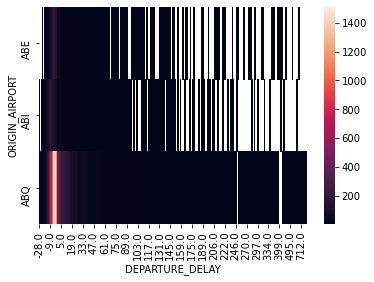

In [21]:
# Считаем кол-во задержек в каждом аэропорте и добавляем в новый столбец
hmap2=delay_map.groupby('DEPARTURE_DELAY')['ORIGIN_AIRPORT'].value_counts().reset_index(name='COUNTS')

# pivot_table преобразует дф в сводную таблицу, по которой будем строить карту сразу по всем аэропортам
heatmap2_data = hmap2.pivot_table(values='COUNTS',index='ORIGIN_AIRPORT',columns='DEPARTURE_DELAY')
# Рисуем карту с задержками по прибытию
seaborn.heatmap(heatmap2_data)

In [22]:
# Оставляем только 3 любых аэропорта, и столбцы с аэропортом и задержкой
delay_map=df[(df['ORIGIN_AIRPORT']=='ABE') | (df['ORIGIN_AIRPORT']=='ABI') |
             (df['ORIGIN_AIRPORT']=='ABQ')][['ORIGIN_AIRPORT','ARRIVAL_DELAY']]
delay_map.sort_values(by=['ORIGIN_AIRPORT'])

,ORIGIN_AIRPORT,ARRIVAL_DELAY
957498,ABE,21.0
2756124,ABE,-11.0
3636336,ABE,-14.0
3181610,ABE,-16.0
5496429,ABE,-23.0
...,...,...
2057493,ABQ,85.0
2057175,ABQ,-24.0
2056889,ABQ,2.0
2055794,ABQ,-7.0


<AxesSubplot:xlabel='ARRIVAL_DELAY', ylabel='ORIGIN_AIRPORT'>

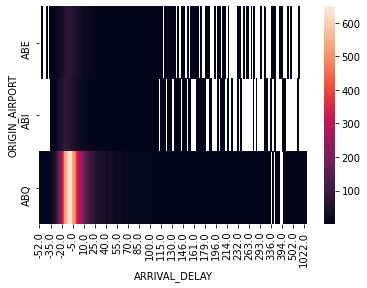

In [23]:
# Считаем кол-во задержек и добавляем в новый столбец
hmap2=delay_map.groupby('ARRIVAL_DELAY')['ORIGIN_AIRPORT'].value_counts().reset_index(name='COUNTS')
# pivot_table преобразует дф в сводную таблицу, по которой будем строить карту сразу по всем аэропортам (индексы - строки)
heatmap2_data = hmap2.pivot_table(values='COUNTS',index='ORIGIN_AIRPORT',columns='ARRIVAL_DELAY')

# Рисуем карту с задержками по отправлению
seaborn.heatmap(heatmap2_data)

# 8.Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине.

In [24]:
# Оставляем колонки с аэропортом и причинами, загоняем в новый дф
reasons = df[['ORIGIN_AIRPORT', 'CANCELLATION_REASON']]

In [25]:
# Исклчаем остальные аэропорты
reasonsORD = reasons[reasons.ORIGIN_AIRPORT == 'ORD']
# dropna убирает отсутствующие значения из дф
reasonsORD = reasonsORD['CANCELLATION_REASON'].dropna()
# Вывод всех рейсов с задержками по данному аэропорту
reasonsORD

298        A
3490       A
4819       A
4957       A
6639       A
          ..
5802205    B
5804788    B
5805130    B
5805355    A
5812129    B
Name: CANCELLATION_REASON, Length: 8548, dtype: object

Причины задержек рейсов из аэропорта ORD


<AxesSubplot:ylabel='ORD_Reasons'>

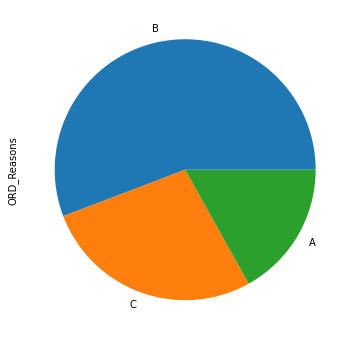

In [26]:
print('Причины задержек рейсов из аэропорта ORD')
reasonsORD.value_counts().plot.pie(ylabel='ORD_Reasons', figsize=(6,6))

In [27]:
# Аналогично оставляем рейсы из аэропорта АNС
reasonsANC = reasons[reasons.ORIGIN_AIRPORT == 'ANC']
reasonsANC = reasonsANC['CANCELLATION_REASON'].dropna()
reasonsANC

32         A
107773     B
154307     A
179210     B
378770     A
          ..
5790670    A
5790783    B
5794588    B
5795611    B
5800869    B
Name: CANCELLATION_REASON, Length: 124, dtype: object

Причины задержек рейсов из аэропорта ANC


<AxesSubplot:ylabel='ANC_Reasons'>

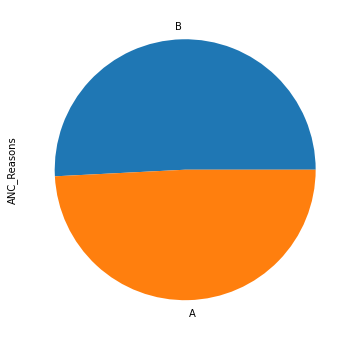

In [28]:
print('Причины задержек рейсов из аэропорта ANC')
reasonsANC.value_counts().plot.pie(ylabel='ANC_Reasons', figsize=(6,6))

In [29]:
# Оставляем рейсы из MIA
reasonsMIA = reasons[reasons.ORIGIN_AIRPORT == 'MIA']
reasonsMIA = reasonsMIA['CANCELLATION_REASON'].dropna()
reasonsMIA

979        A
4078       A
34555      A
34746      A
38896      A
          ..
5782902    A
5783307    A
5796074    B
5797039    B
5818318    A
Name: CANCELLATION_REASON, Length: 783, dtype: object

Причины задержек рейсов из аэропорта MIA


<AxesSubplot:ylabel='MIA_Reasons'>

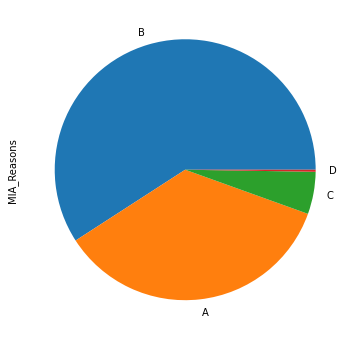

In [30]:
print('Причины задержек рейсов из аэропорта MIA')
reasonsMIA.value_counts().plot.pie(ylabel='MIA_Reasons', figsize=(6,6))

# 9.Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию

In [31]:
# Оставляем колонки с авиалиниями и задержкой по прибытию
max_arrival = df.groupby(['AIRLINE'])[['ARRIVAL_DELAY']].max()
# Сортируем по убыванию
max_arrival = max_arrival.sort_values(by=['ARRIVAL_DELAY'], ascending=False)
# Берем первое значение с головы (максимальное)
print('Максимальная задержка по прибытию:')
max_arrival.head(1)

Максимальная задержка по прибытию:


,ARRIVAL_DELAY
AIRLINE,
AA,1971.0


In [32]:
# Аналогично с задержкой при отправке..
max_departure = df.groupby(['AIRLINE'])[['DEPARTURE_DELAY']].max()
max_departure = max_departure.sort_values(by=['DEPARTURE_DELAY'], ascending=False)
print('Максимальная задержка по отправке:')
max_departure.head(1)

Максимальная задержка по отправке:


,DEPARTURE_DELAY
AIRLINE,
AA,1988.0
